In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

url = 'https://raw.githubusercontent.com/4GeeksAcademy/k-means-project-tutorial/main/housing.csv'

data = pd.read_csv(url) 

data

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [2]:
data.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseVal'],
      dtype='object')

In [3]:
df = data[['MedInc', 
       'Latitude', 'Longitude']]

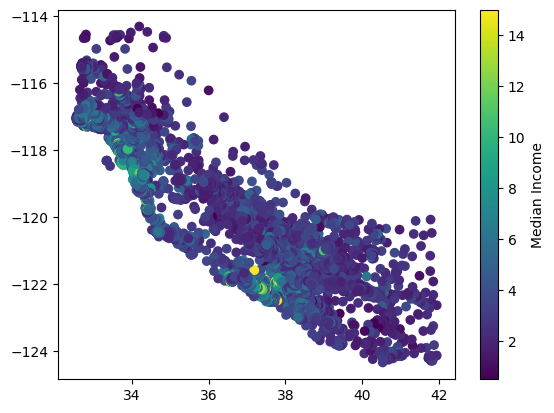

In [4]:
plt.scatter(df['Latitude'], df['Longitude'], c=df['MedInc'], cmap='viridis')
plt.colorbar(label='Median Income')
plt.show()

In [5]:
wcss = []

for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

In [6]:
wcss

[251501.78859624697,
 101042.1185536501,
 73393.9511151485,
 56520.043430974365,
 47201.25619770767,
 39488.78355531115,
 36429.84089370915,
 32100.501748679548,
 28283.00826195267,
 26373.120096456405]

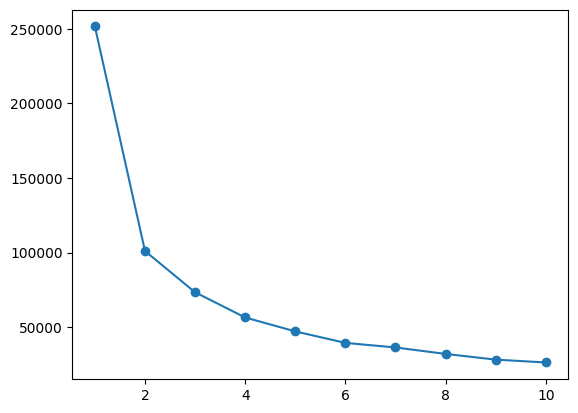

In [7]:
plt.plot(range(1,11), wcss, marker='o')
plt.show()

In [8]:
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)

In [9]:
model = KMeans(n_clusters=5, max_iter=300, init="k-means++")
model.fit(train_data)
kmeans_predict = model.predict(test_data)




In [10]:
train_data["clusters"] = model.labels_

print(train_data)

test_data["clusters"] =  kmeans_predict

print(test_data)

       MedInc  Latitude  Longitude  clusters
14196  3.2596     32.71    -117.03         4
8267   3.8125     33.77    -118.16         4
17445  4.1563     34.66    -120.48         0
14265  1.9425     32.69    -117.11         4
2271   3.5542     36.78    -119.80         1
...       ...       ...        ...       ...
11284  6.3700     33.78    -117.96         0
11964  3.0500     34.02    -117.43         4
5390   2.9344     34.03    -118.38         4
860    5.7192     37.58    -121.96         3
15795  2.5755     37.77    -122.42         1

[16512 rows x 4 columns]
       MedInc  Latitude  Longitude  clusters
20046  1.6812     36.06    -119.01         4
3024   2.5313     35.14    -119.46         4
15663  3.4801     37.80    -122.44         1
20484  5.7376     34.28    -118.72         0
9814   3.7250     36.62    -121.93         1
...       ...       ...        ...       ...
15362  4.6050     33.36    -117.22         0
16623  2.7266     35.36    -120.83         1
18086  9.2298     37.31    -1

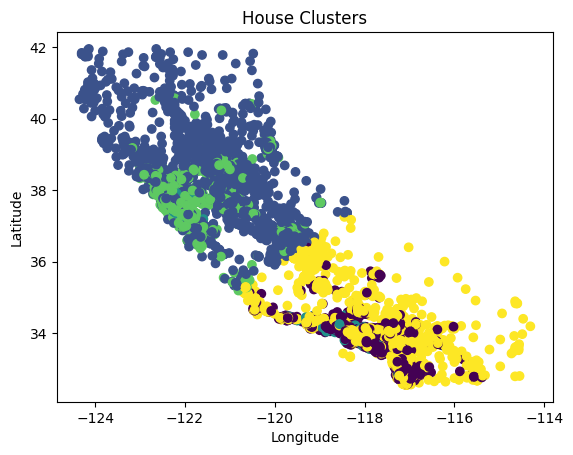

In [11]:
plt.scatter(train_data['Longitude'], train_data['Latitude'], c=train_data['clusters'], cmap='viridis')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('House Clusters')
plt.show()


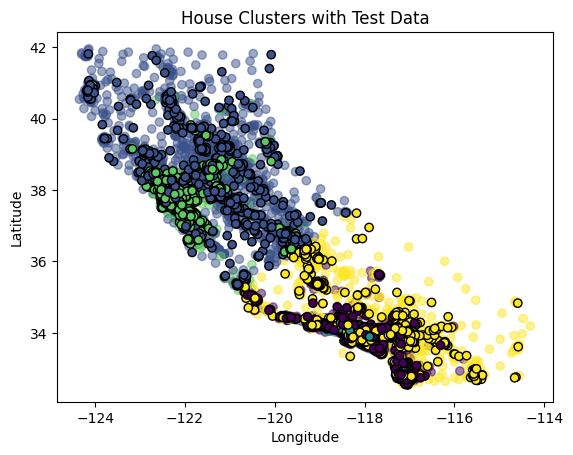

In [12]:

plt.scatter(train_data['Longitude'], train_data['Latitude'], c=train_data['clusters'], cmap='viridis', alpha=0.5)
plt.scatter(test_data['Longitude'], test_data['Latitude'], c=test_data['clusters'], cmap='viridis', edgecolor='k')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('House Clusters with Test Data')
plt.show()




In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score

x = test_data.drop(["clusters"], axis=1)
y = test_data["clusters"] 


In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [16]:
linear_model = LogisticRegression()
linear_model.fit(x_train, y_train)
y_predict = linear_model.predict(x_test)

y_train

/workspaces/generated-images/.venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


15953    1
3335     1
12842    1
15421    0
10144    0
        ..
11176    4
11716    3
9444     1
17554    1
18498    3
Name: clusters, Length: 3302, dtype: int32

In [17]:
score = r2_score(y_test, y_predict)

score

0.8873179589938097

In [24]:
y_train = pd.DataFrame(y_train)

y_train.columns


Index(['clusters'], dtype='object')

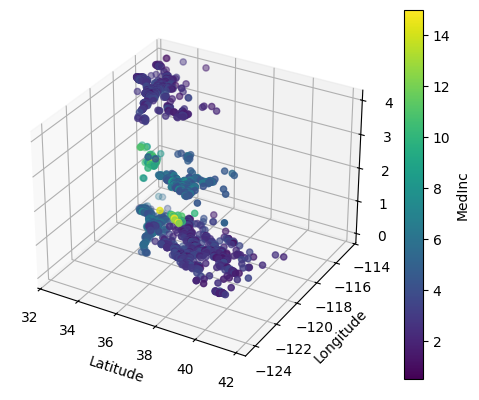

In [25]:
# Create 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plotting the scatter plot
sc = ax.scatter(x_train['Latitude'], x_train['Longitude'], y_train['clusters'], c=x_train['MedInc'], cmap='viridis')

# Adding color bar
cbar = plt.colorbar(sc)
cbar.set_label('MedInc')

# Setting labels
ax.set_xlabel('Latitude')
ax.set_ylabel('Longitude')
ax.set_zlabel('clusters')

plt.show()

In [31]:
y_predict = pd.DataFrame(y_predict)

y_predict.columns = ["clusters"]

y_predict


,clusters
0,4
1,0
2,3
3,3
4,1
...,...
821,1
822,1
823,4
824,2


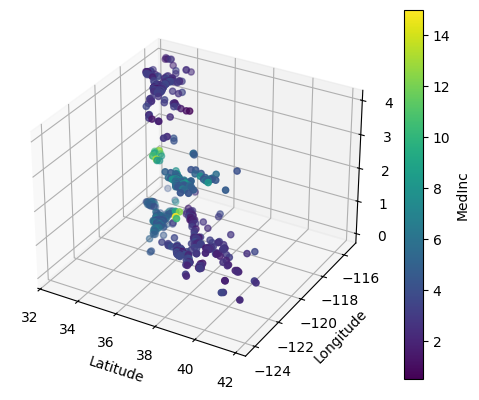

In [33]:
# Create 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plotting the scatter plot
sc = ax.scatter(x_test['Latitude'], x_test['Longitude'], y_predict['clusters'], c=x_test['MedInc'], cmap='viridis')

# Adding color bar
cbar = plt.colorbar(sc)
cbar.set_label('MedInc')

# Setting labels
ax.set_xlabel('Latitude')
ax.set_ylabel('Longitude')
ax.set_zlabel('clusters')

plt.show()